In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir("../")

In [12]:
from data_processing.start_experiment import *
from data_processing.read_data import *

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs import RandomDesign
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
import GPy

In [5]:
file_name = "basic_chemotax2.par"
output_file = "data_cellcount_testing.txt"

mcs = 10000
season_experiment = 1
season_duration = 1000

create_config(file_name, {'mcs': mcs,
                          'season_experiment': season_experiment,
                          'season_duration': season_duration, 
                         'keylock_list_filename': '../data/keylock/KL_l24_14_16_g6.dat',
                         'evolsim': 1,
                        'mut_rate': 0.0})

In [6]:
execute_experiment(file_name,output_file)

Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 10000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 1000]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 

Starting the dish. Initialising...


Time = 1000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 2000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 1000


Time = 3000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 2000
End of season: Gradient switching at time (+/- 25 MCS) = 3000


Time = 4000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 4000


Time = 5000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 5000


Time = 6000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 6000


Time = 7000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 7000


Time = 8000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 8000


Time = 9000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 10000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 9000
End of season: Gradient switching at time (+/- 25 MCS) = 10000


In [10]:
all_cells = read_data("data_cellcount_testing.txt")
all_times = sorted(list(set([i.time for i in all_cells])))

In [15]:
weighted_size_over_time = [weighted_blobsize_cells(all_cells,i) for i in all_times]
num_blobs_over_time = [num_blobs_cells(all_cells,i) for i in all_times]

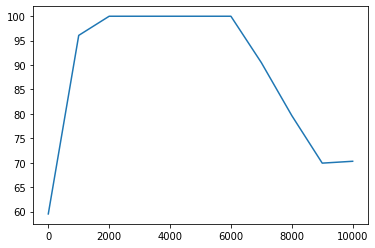

In [16]:
plt.plot(all_times,weighted_size_over_time)

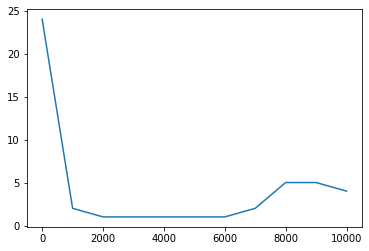

In [17]:
plt.plot(all_times,num_blobs_over_time)

In [45]:
def get_reward(X):
    rewards = np.empty(shape=[0, 1])
    file_name = "basic_chemotax2.par"
    output_file = "data_cellcount_testing.txt"
    mcs = 1000
    season_experiment = 1
    save_text_file_period = 10

    
    for i in range(X.shape[0]):
        season_duration = int(X[i,None])
        print("Season duration is {}".format(season_duration))
        create_config(file_name, {'mcs': mcs,
                          'season_experiment': season_experiment,
                          'season_duration': season_duration, 
                         'keylock_list_filename': '../data/keylock/KL_l24_14_16_g6.dat',
                        'save_text_file_period': save_text_file_period,
                         'evolsim': 1,
                        'mut_rate': 0.0})
        execute_experiment(file_name,output_file)
        
        all_cells = read_data("data_cellcount_testing.txt")
        all_times = sorted(list(set([i.time for i in all_cells])))
        
        weighted_size_over_time = [weighted_blobsize_cells(all_cells,i) for i in all_times]
        
        average_weighted_size = np.mean(weighted_size_over_time)
        
        rewards = np.vstack([rewards, average_weighted_size])
    return rewards

In [33]:
get_reward(np.array([100,200]))

Season duration is 100
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 100]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.

End of season: Gradient switching at time (+/- 25 MCS) = 100


Time = 300
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 200
End of season: Gradient switching at time (+/- 25 MCS) = 300


Time = 400
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 500
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 400
End of season: Gradient switching at time (+/- 25 MCS) = 500


Time = 600
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 700
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 600


Time = 800
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 700
End of season: Gradient switching at time (+/- 25 MCS) = 800


Time = 900
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 900


Time = 1000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 1000
Season duration is 200
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 100]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.

End of season: Gradient switching at time (+/- 25 MCS) = 200


Time = 400
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 400


Time = 600
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 600


Time = 800
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells
Time = 1000
End of season: there are 100 cells
After reproduction there are 150 cells
After remove there are 100 cells


End of season: Gradient switching at time (+/- 25 MCS) = 800
End of season: Gradient switching at time (+/- 25 MCS) = 1000


array([[91.90909091],
       [88.62545455]])

In [34]:
parameter_space = ParameterSpace([DiscreteParameter('season_duration',list(range(100,1000,10)))])

In [46]:
design = RandomDesign(parameter_space) 
X = design.get_samples(3)

In [47]:
Y = get_reward(X)
kernel = GPy.kern.Matern52(3)
model_gpy = GPRegression(X,Y,kernel = kernel) 
model_gpy.Gaussian_noise.constrain_fixed(1e-8)  ## exact evaluations of the objective
model_gpy.optimize_restarts(3)
model_emukit = GPyModelWrapper(model_gpy)
model_emukit.optimize()

Season duration is 820
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 10]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.0

Season duration is 660
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 10]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.0

Season duration is 330
Starting the dish. Initialising...


Opening ../data/parameters/basic_chemotax2.par for reading
[T  = 1.600000e+01]
[target_area  = 50]
[half_div_area  = 500]
[half_div_area_2  = -1]
[target_length  = 0]
[lambda  = 5.000000e+00]
[lambda2  = 0.000000e+00]
[keylock_list_filename  = ../data/keylock/KL_l24_14_16_g6.dat]
[conn_diss  = 0]
[vecadherinknockout  = false]
[extensiononly  = false]
[chemotaxis  = 0]
[border_energy  = 100]
[neighbours  = 2]
[min_area_for_life  = 4]
[key_lock_length  = 24]
[periodic_boundaries  = false]
[n_chem  = 0]
[n_init_cells  = 100]
[size_init_cells  = 25]
[sizex  = 500]
[sizey  = 500]
[divisions  = 0]
[mcs  = 1000]
[rseed  = -1]
[subfield  = 1.000000e+00]
[relaxation  = 0]
[storage_stride  = 1000]
[graphics  = false]
[store  = true]
[datadir  = data_film2]
[datafile  = data_cellcount.txt]
[save_text_file_period  = 10]
[food_influx_location  = specified_experiment]
[initial_food_amount  = 0.000000e+00]
[foodinflux  = 5.000000e-02]
[eatprob  = 1.000000e+00]
[ardecay  = 0.000000e+00]
[growth  = 0.0

AssertionError: At least 3 dimensional X needed, X.shape=(3, 1)